In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xesmf as xe
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import math
import xlrd
import os
import matplotlib.colors as colors
import scipy
from matplotlib import gridspec 

In [49]:
'''Define pimp generations and model names'''
# This cell lists the models involved in PMIP4 and PMIP3
pmip = {}
pmip['PMIP4'] = ['ACCESS-ESM1-5',
                 'AWI-ESM-1-1-LR',
                 'AWI-ESM-2-1-LR',
                 'CESM2',
                 'CNRM-CM6-1',
                 'EC-Earth3-LR',
                 'FGOALS-f3-L',
                 'FGOALS-g3',
                 'GISS-E2-1-G',
                 'HadGEM3-GC31-LL',
                 'INM-CM4-8',
                 'IPSL-CM6A-LR',
                 'MIROC-ES2L',
                 'MPI-ESM1-2-LR',
                 'MRI-ESM2-0',
                 'NESM3',
                 'NorESM1-F',
                 'NorESM2-LM',
                 'UofT-CCSM-4']
pmip['PMIP3'] = ['BCC-CSM1-1',
                 'CCSM4',
                 'CNRM-CM5',
                 'CSIRO-Mk3L-1-2',
                 'CSIRO-Mk3-6-0',
                 'EC-EARTH-2-2',
                 'FGOALS-g2',
                 'FGOALS-s2',
                 'GISS-E2-R',
                 'HadGEM2-CC',
                 'HadGEM2-ES',
                 'IPSL-CM5A-LR',
                 'MIROC-ESM',
                 'MPI-ESM-P',
                 'MRI-CGCM3']

In [15]:
eeco_model = ['CESM1.2_9xCO2','CESM1.2_6xCO2','COSMOS_4xCO2','GFDL_4xCO2','GFDL_6xCO2','INM-CM4-8_6xCO2','NorESM1-f_4xCO2']
pi_model = ['CESM1.2_piControl','CESM1.2_piControl','COSMOS_piControl','GFDL_piControl','GFDL_piControl','INM-CM4-8_piControl','NorESM1-f_piControl']

In [26]:

savefile = 'fig2data/deepmip_eeco_mon.nc' 
lonS = np.arange(-179.5, 180., 1.0) 
latS = np.arange(-89.5, 90., 1.0) 

d = Dataset(savefile,'w',format='NETCDF4') 
d.createDimension('longitude',96)  
d.createDimension('latitude',73) 
 
d.close()


In [ ]:
expt_a_file = xr.open_dataset('fig2data/eeco/%s-tas.nc'%eeco_model[i],decode_times=False)
d = Dataset('fig2data/deepmip_eeco_mon.nc','a')

In [70]:
DATA

{'CESM1.2_9xCO2': <xarray.DataArray 'tas' (month: 12, latitude: 73, longitude: 96)>
 array([[[55.0813  , 55.086746, 55.08641 , ..., 55.098877, 55.090897,
          55.08194 ],
         [53.942123, 53.856247, 53.794724, ..., 54.37857 , 54.226288,
          54.08107 ],
         [52.509003, 52.233536, 51.99031 , ..., 53.628723, 53.215866,
          52.85283 ],
         ...,
         [77.82355 , 78.39575 , 78.972046, ..., 76.46324 , 77.01941 ,
          77.562546],
         [78.448105, 78.76869 , 78.977905, ..., 78.056335, 78.25664 ,
          78.402374],
         [77.754166, 77.50427 , 77.89334 , ..., 77.4872  , 77.31006 ,
          77.72618 ]],
 
        [[53.584457, 53.573807, 53.558   , ..., 53.62152 , 53.60927 ,
          53.595245],
         [52.75151 , 52.640503, 52.55014 , ..., 53.205475, 53.04828 ,
          52.898666],
         [51.524475, 51.20169 , 50.9021  , ..., 52.698563, 52.27661 ,
          51.895554],
 ...
         [62.853012, 63.13234 , 63.343307, ..., 61.96826 , 62.3351

In [48]:

        
expt_a_file = xr.open_dataset('fig2data/eeco/%s-tas.nc'%eeco_model[2],decode_times=False)
expt_a = expt_a_file['tas']
expt_b_file = xr.open_dataset('fig2data/eeco/%s-tas.nc'%pi_model[2],decode_times=False)
expt_b = expt_b_file['tas']
diff = expt_a - expt_b
DATA[eeco_model[2]] = diff


IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

In [7]:
data1 = np.array(data)
ave = diff_1x1
ave.values = np.average(data1,axis=0)
d.createVariable('ave','f',("lat",'lon'))  #remove this line if you don't want to save the resluts
d.variables['ave'][:] = ave  #remove this line if you don't want to save the resluts
std = diff_1x1
std.values = np.std(data1,axis=0)       
d.createVariable('std','f',("lat",'lon'))  #remove this line if you don't want to save the resluts
d.variables['std'][:] = std  #remove this line if you don't want to save the resluts
d.close()    

<xarray.DataArray 'tas' (month: 12, lat: 180, lon: 360)>
array([[[75.73502135, 75.77696839, 75.81942624, ..., 75.76233385,
         75.74270787, 75.72359564],
        [72.32462993, 72.34202525, 72.36097691, ..., 72.35389863,
         72.3377793 , 72.32321009],
        [68.91253349, 68.90406928, 68.89967032, ..., 68.94282063,
         68.92997653, 68.92114258],
        ...,
        [55.34433325, 55.35522461, 55.36618307, ..., 55.31056961,
         55.32185032, 55.33320605],
        [55.30572976, 55.31344785, 55.32114614, ..., 55.28179502,
         55.28983272, 55.29785645],
        [55.26705118, 55.2715093 , 55.27596037, ..., 55.2528736 ,
         55.25765476, 55.26243174]],

       [[73.79005835, 73.81250732, 73.83536143, ..., 73.7948318 ,
         73.78818577, 73.78194762],
        [71.09987919, 71.10875606, 71.11886104, ..., 71.09967532,
         71.09724346, 71.09603854],
        [68.4079399 , 68.40172036, 68.39922418, ..., 68.40180871,
         68.40329287, 68.408414  ],
...
        [54.30946885, 54.31482393, 54.32026365, ..., 54.29288886,
         54.29839573, 54.30399221],
        [54.39102048, 54.39576167, 54.40053893, ..., 54.37698273,
         54.38162548, 54.38630699],
        [54.47253998, 54.47664839, 54.48076825, ..., 54.46102171,
         54.46479847, 54.46858865]],

       [[69.48034369, 69.52717648, 69.57443986, ..., 69.51513799,
         69.49158968, 69.4684766 ],
        [66.58790542, 66.61607491, 66.64556106, ..., 66.60330095,
         66.59071524, 66.57944772],
        [63.69385419, 63.70205914, 63.71391527, ..., 63.68897794,
         63.68710861, 63.68883537],
        ...,
        [55.13029973, 55.13766718, 55.14511719, ..., 55.11082078,
         55.11708508, 55.12343849],
        [55.2095099 , 55.21545041, 55.22142557, ..., 55.19396952,
         55.19897383, 55.20401623],
        [55.28868799, 55.29318269, 55.29768837, ..., 55.27706204,
         55.28080478, 55.28456068]]])
Coordinates:
  * month    (month) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    regrid_method:  bilinear

In [119]:
cmap=plt.get_cmap('bwr')
bounds1=[-40,-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,40]
bounds2=np.arange(-10,11,1)
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)



In [97]:

def axplot(ax,m,modeldata,bounds1,norm1):
    projection = ccrs.Robinson()
    transform=ccrs.PlateCarree()
    ax.set_title(m,fontsize=15)
    ax.coastlines()
    ax.gridlines()
    fig=ax.contourf(modeldata.lon,modeldata.lat,modeldata,levels=bounds1,transform=transform,cmap=cmap,norm=norm1)
    cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in [ax]],location='bottom',pad=0.05,fraction=0.05)
    cb1=plt.colorbar(fig, cax=cax1, **kw1,extend='max')
    cb1label='Temperature anomaly (%sC)' %chr(176)
    cb1.set_label(cb1label,fontsize=12)
    cb1.ax.tick_params(labelsize=10)
    return fig

def plotdata(var,ax,m,data):
    fig=axplot(ax,m,modeldata)
    return fig

In [51]:
def axplot2(ax,title,name):
    M = pd.read_csv('fig2data/PMIP4_%s.csv'%name,header=0)
    models = M['0']
    data = xr.open_dataset('fig2data/PMIP4_%s.nc'%name,decode_times=False)
    lat=data['lat']
    ave=np.average(data['ave'],axis=1)
    plt.xlim([-90,90])
    plt.axhline(y=0,color='k')
    plt.plot(lat,ave,color='r',lw=2.5)
    plt.title(title,fontsize=15)
    for m in models:
        am = np.average(data[m],axis=1)
        plt.plot(lat,am,color='r',lw=1,alpha=0.3)
    plt.xlabel('latitude (%sN)'%chr(176),fontsize=12)
    plt.ylabel('Temperature anomaly (%sC)' %chr(176),fontsize=12)

In [52]:
lig = xr.open_dataset('fig2data/PMIP4_lig.nc',decode_times=False)
ligave = lig['ave']
liglat = lig['lat']
liglon = lig['lon']

In [53]:
mh = xr.open_dataset('fig2data/PMIP4_mh.nc',decode_times=False)
mhave = mh['ave']
mhlat = mh['lat']
mhlon = mh['lon']

In [54]:
lgm = xr.open_dataset('fig2data/PMIP4_lgm.nc',decode_times=False)
lgmave = lgm['ave']
lgmlat = lgm['lat']
lgmlon = lgm['lon']

In [99]:
# PlioMIP2
mpwp = xr.open_dataset('fig2data/PlioMIP2.nc',decode_times=False)
mpwpave = mpwp['nearsurfacetemperaturemean_anomaly']

def axplot1(ax,m,modeldata,bounds1,norm1):
    projection = ccrs.Robinson()
    transform=ccrs.PlateCarree()
    ax.set_title(m,fontsize=15)
    ax.coastlines()
    ax.gridlines()
    fig=ax.contourf(modeldata.longitude,modeldata.latitude,modeldata,levels=bounds1,transform=transform,cmap=cmap,norm=norm1)
    cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in [ax]],location='bottom',pad=0.05,fraction=0.05)
    cb1=plt.colorbar(fig, cax=cax1, **kw1,extend='max')
    cb1label='Temperature anomaly (%sC)' %chr(176)
    cb1.set_label(cb1label,fontsize=12)
    cb1.ax.tick_params(labelsize=10)
    return fig

def plotdata1(var,ax,m,data):
    fig=axplot1(ax,m,modeldata)
    return fig

In [56]:
def axplot22(ax,title,data):
    lat=data.latitude
    ave=np.average(data,axis=1)
    plt.xlim([-90,90])
    plt.title(title,fontsize=15)
    plt.axhline(y=0,color='k')
    plt.plot(lat,ave,color='r',lw=2.5)
    #for m in models:
     #   am = np.average(data[m],axis=1)
     #   plt.plot(lat,am,color='r',lw=1,alpha=0.3)
    plt.xlabel('latitude (%sN)'%chr(176),fontsize=12)
    plt.ylabel('Temperature anomaly (%sC)' %chr(176),fontsize=12)

In [66]:
mpwp_model_data= pd.read_csv('fig2data/pliomip2_mpwp.csv',header=0)
mpwp_model= pd.read_csv('fig2data/PlioMIP2_model.csv',header=0)['0']

In [ ]:
mh_recons =pd.read_csv('fig2data/recons/mh_Bartlein2014.csv',skipinitialspace=True,header=0)
lgm1_recons =pd.read_csv('fig2data/recons/lgm_Cleator2019.csv',skipinitialspace=True,header=21)
lgm2_recons =pd.read_csv('fig2data/recons/lgm_Tierney2020.csv',skipinitialspace=True,header=0)

In [108]:
lig_recons = pd.read_csv('fig2data/recons/lig.csv',skipinitialspace=True,header=0)

In [116]:
mpwp_recons = pd.read_csv('fig2data/recons/mpwp.csv',skipinitialspace=True,header=0)

<ipython-input-97-6622ca3cf5b8>:9: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb1=plt.colorbar(fig, cax=cax1, **kw1,extend='max')
<ipython-input-99-28963646d320>:13: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb1=plt.colorbar(fig, cax=cax1, **kw1,extend='max')


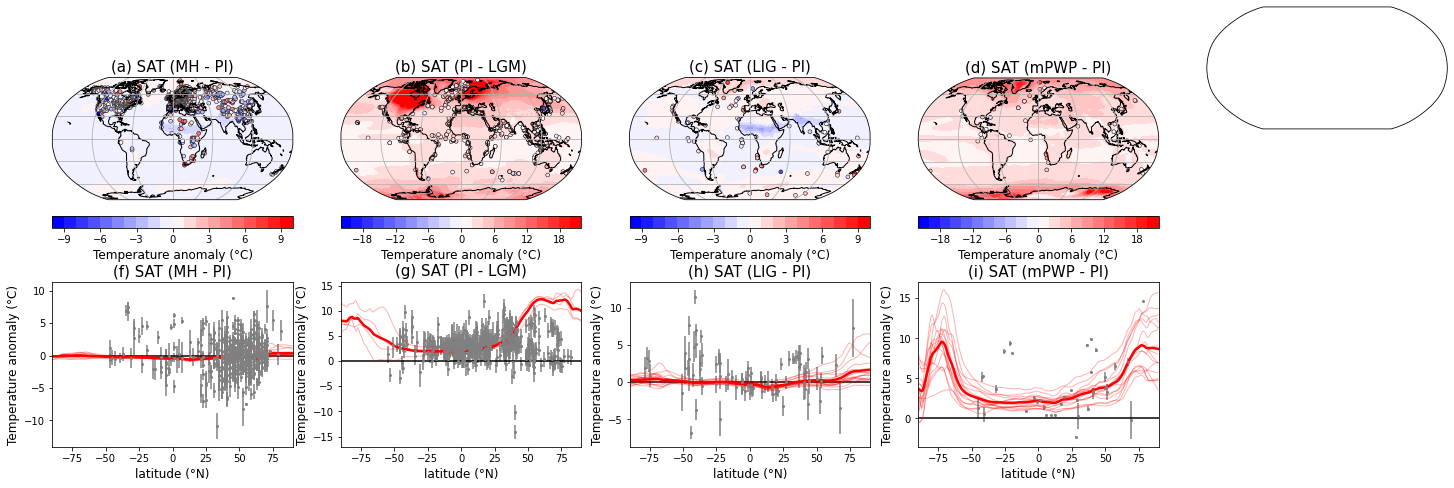

In [118]:
plt.figure(figsize=(25,10))
gs = gridspec.GridSpec(2,5,width_ratios=[1,1,1,1,1],height_ratios=[2,1]) 
#mh
ax0=plt.subplot(gs[0],projection= ccrs.Robinson())
axplot(ax0,'(a) SAT (MH - PI)',mhave,bounds2,norm2)
ax0.scatter(mh_recons['lon'],mh_recons['lat'],c=mh_recons['mat_anm_mean'],marker='o',s=15,linewidths=0.5,edgecolors='k',cmap=cmap,transform=ccrs.PlateCarree(),norm=norm2)
#lgm    
ax1=plt.subplot(gs[1],projection= ccrs.Robinson())
axplot(ax1,'(b) SAT (PI - LGM)',lgmave,bounds1,norm1)
#ax1.scatter(lgm1_recons['lon'],lgm1_recons['lat'],c=lgm1_recons['MAT'],marker='o',s=15,linewidths=0.5,edgecolors='k',cmap=cmap,transform=ccrs.PlateCarree(),norm=norm2)
ax1.scatter(lgm2_recons['Longitude'],lgm2_recons['Latitude'],c=0-lgm2_recons['Median'],marker='o',s=15,linewidths=0.5,edgecolors='k',cmap=cmap,transform=ccrs.PlateCarree(),norm=norm1)


#lig
ax2=plt.subplot(gs[2],projection= ccrs.Robinson())
axplot(ax2,'(c) SAT (LIG - PI)',ligave,bounds2,norm2)
ax2.scatter(lig_recons['Longitude'],lig_recons['Latitude'],c=lig_recons['Anom'],marker='o',s=15,linewidths=0.5,edgecolors='k',cmap=cmap,transform=ccrs.PlateCarree(),norm=norm2)

#mpwp
ax3=plt.subplot(gs[3],projection= ccrs.Robinson())
axplot1(ax3,'(d) SAT (mPWP - PI)',mpwpave,bounds1,norm1)
ax3.scatter(mpwp_recons['lon'],mpwp_recons['lat'],c=mpwp_recons['Anom'],marker='o',s=15,linewidths=0.5,edgecolors='k',cmap=cmap,transform=ccrs.PlateCarree(),norm=norm1)



ax4=plt.subplot(gs[4],projection= ccrs.Robinson())


#lat averaged
#MH
ax5=plt.subplot(gs[5])
mhyerr=[ mh_recons['mat_se_mean'],mh_recons['mat_se_mean']]
ax5.errorbar(mh_recons['lat'],mh_recons['mat_anm_mean'], yerr=mhyerr,marker='o',color='grey',ms=2,ls='none')
axplot2(ax5,'(f) SAT (MH - PI)','mh')
#LGM
ax6=plt.subplot(gs[6])
#lgm1yerr=[ lgm1_recons['MAT_SD'],lgm1_recons['MAT_SD']]
#ax6.errorbar(lgm1_recons['lat'],0-lgm1_recons['MAT'], yerr=lgm1yerr,marker='o',color='grey',ms=2,ls='none')
lgm2yerr=[lgm2_recons['Lower2s']-lgm2_recons['Median'],lgm2_recons['Median']-lgm2_recons['Upper2s']]
ax6.errorbar(lgm2_recons['Latitude'],0-lgm2_recons['Median'], yerr=lgm2yerr,marker='o',color='grey',ms=2,ls='none')
axplot2(ax6,'(g) SAT (PI - LGM)','lgm')
#LIG
ax7=plt.subplot(gs[7])
ligyerr=[lig_recons['1SD'],lig_recons['1SD']]
ax7.errorbar(lig_recons['Latitude'],lig_recons['Anom'], yerr=ligyerr,marker='o',color='grey',ms=2,ls='none')
axplot2(ax7,'(h) SAT (LIG - PI)','lig')
#mpwp
ax8=plt.subplot(gs[8])
mpwpyerr=[mpwp_recons['std'],mpwp_recons['std']]
ax8.errorbar(mpwp_recons['lat'],mpwp_recons['Anom'], yerr=mpwpyerr,marker='o',color='grey',ms=2,ls='none')
axplot22(ax8,'(i) SAT (mPWP - PI)',mpwpave)
for m in mpwp_model:
    ax8.plot(mpwp_model_data['latitude'],mpwp_model_data[m],color='r',lw=1,alpha=0.3)